# Utilisation de l'API GitHub

In [44]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from threading import Thread, RLock
import sys
import time
import os
import random
import matplotlib.pyplot as plt

# Creation de la classe thread et des fonctions utilisées

In [45]:

verrou = RLock()
verrou_req = RLock()

def remain_req():
    
    """ return the number of remaining request"""
    
    return requests.get("https://api.github.com/rate_limit",headers=headers).json()["rate"]["remaining"]

def get_top_users():
    
    """Find the top contributors from the Github page of paulmillr with webscraping"""
    
    
    req = requests.get("https://gist.github.com/paulmillr/2657075")
    if req.status_code == 200:
        soup = BeautifulSoup(req.content, "html.parser")
        table = soup.find("table").findAll("tr")[1:]
        return [row.find("td").text.split()[0] for row in table]
    else:
        print("Status Code Error")
        
def star_count_t(page):
    
    """for a given page, return the number of stars, and the number of repos"""
    
    stars = [(repos["name"],repos["stargazers_count"]) for repos in page]
    return stars



def req_200(string):
    
    """Return the request only if code 200"""
    
    j=0
    token = "aea180d22fa3e87f21fa6cdded2c9a39572b2bc7"
    headers = {'Authorization': 'token {}'.format(token)}
    while True:
        req = requests.get(string,headers=headers)
        if req.status_code == 200:
            break
        else:
            time.sleep(round(random.uniform(0, 1)*5,1))
        j+=1
        if j==50:
            break
    return req



def all_page_count_t(user):
    
    """Count all requiered parameters from repos pages for a given user"""
    
    i=1
    all_repos = []
    req = req_200(f"https://api.github.com/users/{user}/repos?page=1&per_page=100")
    while len(req.json()) != 0:
        i+=1
        page = req.json()
        all_repos+=star_count_t(page)
        time.sleep(round(random.uniform(0, 1)*1,1))
        req = req_200(f"https://api.github.com/users/{user}/repos?page={i}&per_page=100")
        if i==50:
            break
    return dict(all_repos)

            
            
            
    return dict(all_repos)

def stars_users_t(user,stars):
    #Creation d'un dictionnaire résumant le nombre de stars et de repos pour chaque user
    repos_user = all_page_count_t(user)
    with verrou:
        stars["user"].append(user)
        stars["#_repos"].append(len(repos_user.keys()))
        stars["tot_stars"].append(sum(repos_user.values()))
        return stars

class git_crawl_user(Thread):
    

    """Thread in charge of loading information about a given Github user"""


    def __init__(self, user, stars):

        Thread.__init__(self)

        self.user = user
        
        self.stars = stars

        
    

    def run(self):
        self.stars=stars_users_t(self.user,self.stars)

## On crawl le top 256 contributors 

In [ ]:

#WARNING : the token has been removed so the code can be safely put on Github, it has to be re-uploaded
token = "aea180d22fa3e87f21fa6cdded2c9a39572b2bc7"
headers = {'Authorization': 'token {}'.format(token)}

#Initiatilisation du dictionnaire principale
stars = {}
stars["user"]=[]
stars["#_repos"]=[]
stars["tot_stars"]=[]
av = []
time_s = []

#On compte le nombre de requêtes effectués
#initiatisation
requests.get("https://api.github.com/rate_limit",headers=headers).content
r1 = requests.get("https://api.github.com/rate_limit",headers=headers).json()["rate"]["remaining"]

t1 = time.time()
ttr=t1
ttr2=t1
#Calcul de la liste des utilisateurs les plus actifs
list_users=get_top_users()

#Creation des threads
i=0
for user in list_users:
    thread=git_crawl_user(user,stars)
    thread.start()
    time.sleep(round(random.uniform(0, 1)*1,1))
    tt = time.time()
    if abs(ttr2-tt) > 1:
        av.append(round(len(stars['user'])/len(list_users)*100))
        time_s.append(tt-t1)
        ttr2=tt
        i=0
    if abs(ttr-tt) > 20:
        print(f"Avancement : {round(len(stars['user'])/len(list_users)*100,0)} %")
        ttr=tt
        i=0
        
while len(stars['user'])<len(list_users):
    tt = time.time()
    if abs(ttr2-tt) > 1:
        av.append(round(len(stars['user'])/len(list_users)*100))
        time_s.append(tt-t1)
        ttr2=tt
        i=0
    if abs(ttr-tt) > 20:
        print(f"Avancement : {round(len(stars['user'])/len(list_users)*100,0)} %")
        ttr = tt
    pass
    
t2 = time.time()

r2 = requests.get("https://api.github.com/rate_limit",headers=headers).json()["rate"]["remaining"]
print(f"\n\nTache terminé en {round((t2-t1)/60,1)} min")


print(f"\n\nRequêtes utilisés : {(r1-r2)}")


df=pd.DataFrame(stars)
df["moyenne"]=round(df["tot_stars"]/df["#_repos"])
df=df.sort_values("moyenne", ascending=False)



    

In [ ]:
df=pd.DataFrame(stars)
df["moyenne"]=round(df["tot_stars"]/df["#_repos"])
df["repo_page"]=np.ceil(df["#_repos"]/100)
df.sort_values("#_repos", ascending=False)
df["repo_page"].sum()

In [8]:
remain_req()

5000

In [22]:
round(random.uniform(0, 1)*10,1)

4.9

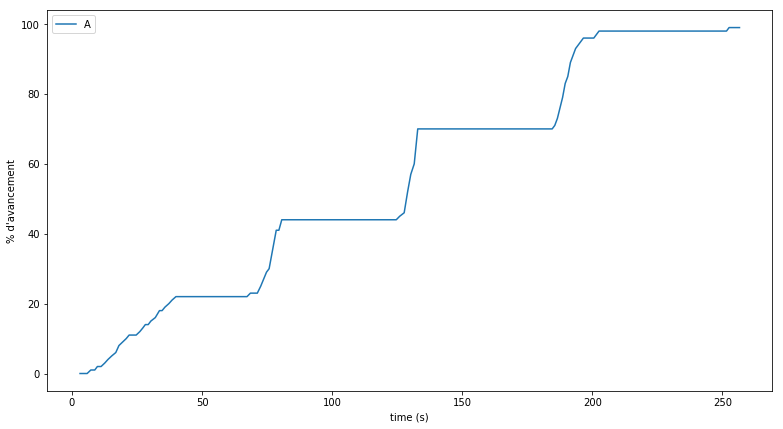

In [7]:
##Cas un : Utilisation de temps d'attentes randoms

plt.figure(figsize=(13,7))
plt.plot(time_s,av)
plt.xlabel("time (s)")
plt.ylabel("% d'avancement")
plt.legend(("Avancement du scraping Github en fonction du temps"))
plt.show()


In [2]:
req = requests.get(f"https://api.github.com/")

In [31]:
token = "aea180d22fa3e87f21fa6cdded2c9a39572b2bc7"
headers = {'Authorization': f'token {token}'}
req.json()
user="ask"
r=requests.get(f"https://open-medicaments.fr/api/v1/medicaments?limit=100&query=paracetamol")
r.json()

[{'codeCIS': '67445776', 'denomination': 'PARACETAMOL ZYDUS 500 mg, gélule'},
 {'codeCIS': '62721886',
  'denomination': 'PARACETAMOL RATIOPHARM 1000 mg, comprimé'},
 {'codeCIS': '62772966', 'denomination': 'PARACETAMOL EG 1 g, comprimé'},
 {'codeCIS': '67034675', 'denomination': 'PARACETAMOL SANDOZ 500 mg, gélule'},
 {'codeCIS': '61223352',
  'denomination': 'PARACETAMOL RATIOPHARM 500 mg, gélule'},
 {'codeCIS': '65085849',
  'denomination': 'PARACETAMOL ARROW 500 mg, comprimé effervescent'},
 {'codeCIS': '61754805',
  'denomination': 'PARACETAMOL AHCL 1 g, comprimé effervescent'},
 {'codeCIS': '60777377',
  'denomination': 'PARACETAMOL ISOMED 500 mg, comprimé effervescent'},
 {'codeCIS': '62502166',
  'denomination': 'PARACETAMOL RATIOPHARM 500 mg, comprimé sécable'},
 {'codeCIS': '68830091',
  'denomination': 'PARACETAMOL EVOLUGEN 1 g, comprimé sécable'},
 {'codeCIS': '64500406',
  'denomination': 'PARACETAMOL ZENTIVA CONSEIL 500 mg, comprimé'},
 {'codeCIS': '64503085',
  'denominat

In [42]:
dicta = [[10,374],[2211, 323],[3267]]

In [43]:
pd.DataFrame(dicta,columns=["price","km"])

,price,km
0,10,374.0
1,2211,323.0
2,3267,NaN
